## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.654005  1.184831 -1.315081  0.755437 -1.509116  0.486476
1  1.440297  0.904455 -1.033941  1.032407  1.561824  1.786844
2  0.934589  1.297100  1.529248  0.723630 -0.524240  1.388659
3  0.046120 -0.217582 -0.900201 -0.703847 -0.284445 -0.238581
4  0.322858  1.089050  0.767134  1.518509 -1.385429  1.290998


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0269681	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0149137	total: 70.1ms	remaining: 35s
2:	learn: 1.0037103	total: 70.9ms	remaining: 23.6s
3:	learn: 0.9924876	total: 71.5ms	remaining: 17.8s
4:	learn: 0.9818865	total: 72.1ms	remaining: 14.3s
5:	learn: 0.9702567	total: 72.6ms	remaining: 12s
6:	learn: 0.9578285	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9483426	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9380071	total: 74.1ms	remaining: 8.16s
9:	learn: 0.9282562	total: 74.7ms	remaining: 7.39s
10:	learn: 0.9202675	total: 75.2ms	remaining: 6.76s
11:	learn: 0.9089219	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8987584	total: 76.2ms	remaining: 5.78s
13:	learn: 0.8902661	total: 76.5ms	remaining: 5.39s
14:	learn: 0.8822945	total: 77ms	remaining: 5.05s
15:	learn: 0.8741730	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8639736	total: 77.9ms	remaining: 4.5s
17:	learn: 0.8551740	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8471058	total: 78.8ms	remaining: 4.07s

85:	learn: 0.4377629	total: 109ms	remaining: 1.16s
86:	learn: 0.4338471	total: 110ms	remaining: 1.15s
87:	learn: 0.4297100	total: 110ms	remaining: 1.14s
88:	learn: 0.4265040	total: 110ms	remaining: 1.13s
89:	learn: 0.4229952	total: 111ms	remaining: 1.12s
90:	learn: 0.4195070	total: 111ms	remaining: 1.11s
91:	learn: 0.4160187	total: 111ms	remaining: 1.1s
92:	learn: 0.4120217	total: 112ms	remaining: 1.09s
93:	learn: 0.4084875	total: 112ms	remaining: 1.08s
94:	learn: 0.4048799	total: 113ms	remaining: 1.07s
95:	learn: 0.4015333	total: 113ms	remaining: 1.06s
96:	learn: 0.3981567	total: 113ms	remaining: 1.05s
97:	learn: 0.3946836	total: 114ms	remaining: 1.05s
98:	learn: 0.3914984	total: 114ms	remaining: 1.04s
99:	learn: 0.3882181	total: 114ms	remaining: 1.03s
100:	learn: 0.3851328	total: 115ms	remaining: 1.02s
101:	learn: 0.3813895	total: 115ms	remaining: 1.01s
102:	learn: 0.3779209	total: 116ms	remaining: 1.01s
103:	learn: 0.3751625	total: 116ms	remaining: 1s
104:	learn: 0.3724035	total: 11

255:	learn: 0.1337621	total: 188ms	remaining: 545ms
256:	learn: 0.1327956	total: 188ms	remaining: 544ms
257:	learn: 0.1319809	total: 189ms	remaining: 543ms
258:	learn: 0.1311815	total: 189ms	remaining: 541ms
259:	learn: 0.1305780	total: 190ms	remaining: 540ms
260:	learn: 0.1300177	total: 190ms	remaining: 539ms
261:	learn: 0.1294565	total: 191ms	remaining: 537ms
262:	learn: 0.1284409	total: 191ms	remaining: 535ms
263:	learn: 0.1278217	total: 192ms	remaining: 534ms
264:	learn: 0.1269910	total: 192ms	remaining: 533ms
265:	learn: 0.1264160	total: 193ms	remaining: 531ms
266:	learn: 0.1256882	total: 193ms	remaining: 530ms
267:	learn: 0.1251626	total: 194ms	remaining: 529ms
268:	learn: 0.1243946	total: 194ms	remaining: 528ms
269:	learn: 0.1237702	total: 195ms	remaining: 526ms
270:	learn: 0.1229005	total: 196ms	remaining: 527ms
271:	learn: 0.1222298	total: 197ms	remaining: 526ms
272:	learn: 0.1216483	total: 197ms	remaining: 525ms
273:	learn: 0.1210064	total: 197ms	remaining: 523ms
274:	learn: 

465:	learn: 0.0488787	total: 293ms	remaining: 335ms
466:	learn: 0.0486044	total: 293ms	remaining: 335ms
467:	learn: 0.0482935	total: 294ms	remaining: 334ms
468:	learn: 0.0478864	total: 294ms	remaining: 333ms
469:	learn: 0.0477013	total: 295ms	remaining: 332ms
470:	learn: 0.0475194	total: 295ms	remaining: 331ms
471:	learn: 0.0472576	total: 296ms	remaining: 331ms
472:	learn: 0.0469620	total: 296ms	remaining: 330ms
473:	learn: 0.0465694	total: 296ms	remaining: 329ms
474:	learn: 0.0461839	total: 297ms	remaining: 328ms
475:	learn: 0.0460096	total: 297ms	remaining: 327ms
476:	learn: 0.0457401	total: 298ms	remaining: 326ms
477:	learn: 0.0453648	total: 298ms	remaining: 326ms
478:	learn: 0.0451954	total: 299ms	remaining: 325ms
479:	learn: 0.0450560	total: 299ms	remaining: 324ms
480:	learn: 0.0448100	total: 300ms	remaining: 324ms
481:	learn: 0.0444874	total: 301ms	remaining: 323ms
482:	learn: 0.0441720	total: 301ms	remaining: 322ms
483:	learn: 0.0439166	total: 302ms	remaining: 322ms
484:	learn: 

633:	learn: 0.0219918	total: 372ms	remaining: 215ms
634:	learn: 0.0219117	total: 372ms	remaining: 214ms
635:	learn: 0.0218319	total: 373ms	remaining: 213ms
636:	learn: 0.0217742	total: 373ms	remaining: 213ms
637:	learn: 0.0217015	total: 374ms	remaining: 212ms
638:	learn: 0.0216236	total: 374ms	remaining: 211ms
639:	learn: 0.0215752	total: 375ms	remaining: 211ms
640:	learn: 0.0214987	total: 375ms	remaining: 210ms
641:	learn: 0.0214438	total: 376ms	remaining: 210ms
642:	learn: 0.0213678	total: 376ms	remaining: 209ms
643:	learn: 0.0212890	total: 377ms	remaining: 208ms
644:	learn: 0.0212360	total: 377ms	remaining: 208ms
645:	learn: 0.0211549	total: 377ms	remaining: 207ms
646:	learn: 0.0210783	total: 378ms	remaining: 206ms
647:	learn: 0.0210483	total: 378ms	remaining: 205ms
648:	learn: 0.0209748	total: 379ms	remaining: 205ms
649:	learn: 0.0209453	total: 379ms	remaining: 204ms
650:	learn: 0.0209093	total: 380ms	remaining: 204ms
651:	learn: 0.0208374	total: 380ms	remaining: 203ms
652:	learn: 

852:	learn: 0.0107106	total: 476ms	remaining: 82ms
853:	learn: 0.0106854	total: 477ms	remaining: 81.5ms
854:	learn: 0.0106520	total: 477ms	remaining: 81ms
855:	learn: 0.0106125	total: 478ms	remaining: 80.4ms
856:	learn: 0.0105810	total: 478ms	remaining: 79.8ms
857:	learn: 0.0105572	total: 479ms	remaining: 79.2ms
858:	learn: 0.0104976	total: 479ms	remaining: 78.7ms
859:	learn: 0.0104392	total: 480ms	remaining: 78.1ms
860:	learn: 0.0104071	total: 480ms	remaining: 77.5ms
861:	learn: 0.0103908	total: 480ms	remaining: 76.9ms
862:	learn: 0.0103734	total: 481ms	remaining: 76.4ms
863:	learn: 0.0103418	total: 481ms	remaining: 75.8ms
864:	learn: 0.0102907	total: 482ms	remaining: 75.2ms
865:	learn: 0.0102763	total: 482ms	remaining: 74.6ms
866:	learn: 0.0102622	total: 483ms	remaining: 74.1ms
867:	learn: 0.0102482	total: 483ms	remaining: 73.5ms
868:	learn: 0.0102344	total: 484ms	remaining: 72.9ms
869:	learn: 0.0101973	total: 484ms	remaining: 72.4ms
870:	learn: 0.0101837	total: 485ms	remaining: 71.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

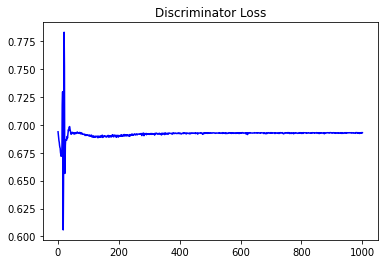

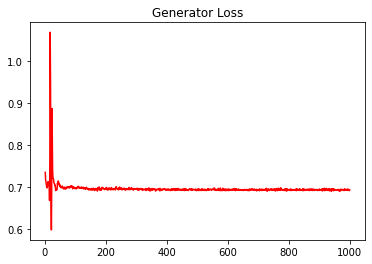

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.028862830828705163


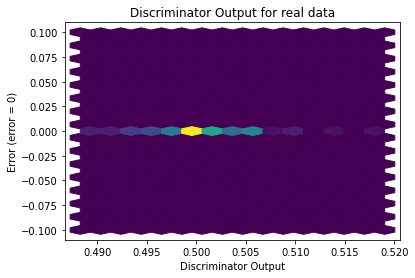

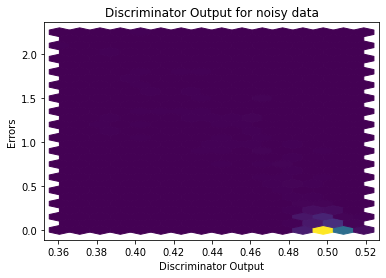

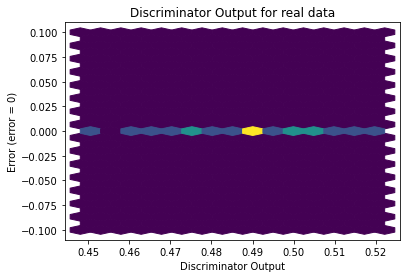

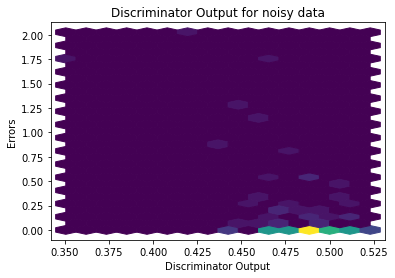

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


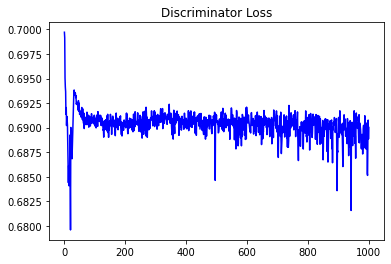

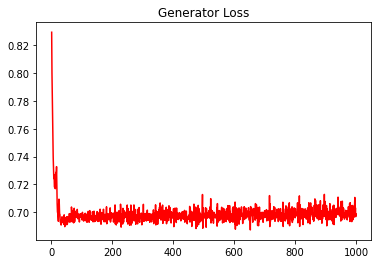

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.027619256296961492


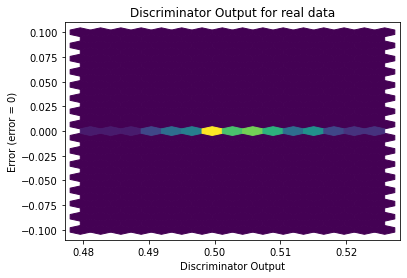

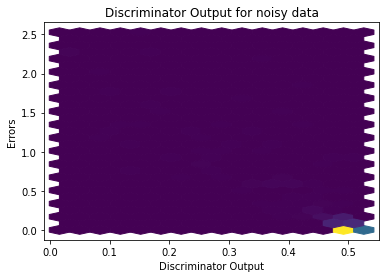

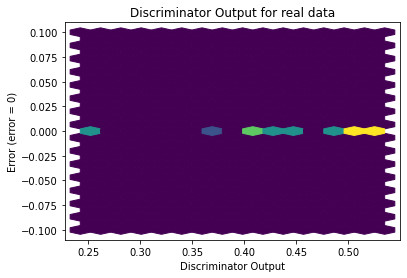

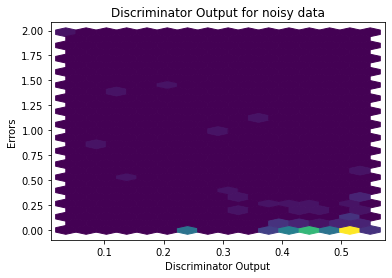

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1317]], requires_grad=True)
